In [1]:
import pandas as pd
import numpy as np

#machine learning
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers 
from tensorflow import keras
from sklearn.model_selection import train_test_split

#accessing files
from google.cloud import storage
import os

#display charts/images
import matplotlib.pyplot as plt

#don't need
# from tensorflow.python.keras.preprocessing import sequence
# from tensorflow.python.keras.preprocessing import text
# import tensorflow_hub as hub

#set random seed
tf.random.set_seed(1)


2.3.0


In [2]:
params = {
    'image_size': [225, 225],
    'text_input': (58,),
    'batch_size': 512,
    'vocab_size': 30000,
    'examples_per_file': 850, #will not change
    'test_examples_per_file': 500
}

In [3]:
try:
    from google.colab import auth
    auth.authenticate_user()
    credentials=None

except ModuleNotFoundError:


    from google.oauth2 import service_account

    credentials = service_account.Credentials.from_service_account_file( #file location of GCS private key
        '/Users/jeremiahherberg/Downloads/hateful-memes-af65c70c1b79.json')

    client = storage.Client(project='hateful-memes', credentials=credentials)

In [4]:
num_examples_per_tfrecordfile = params['examples_per_file'] # 850 #this will not change

In [5]:
bucket = 'jh_hateful_memes'
client = storage.Client(project='hateful-memes', credentials=credentials)
objects = client.list_blobs(bucket, prefix='hatefulmemes_')
tfrecords = []
for object_ in objects:
    path = str(object_).split(', ')[1]
    gs_path = os.path.join('gs://', bucket, path)
    tfrecords.append(gs_path) #gs_path

In [6]:
# tfrecords

In [7]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.25.253.170:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.25.253.170:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.25.253.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [8]:
def decode_example(example):
    '''
    decodes single tfexample from TFrecord file
    '''
    features = {'label': tf.io.FixedLenFeature([], tf.int64),
                'text': tf.io.FixedLenFeature([], tf.string),
                'text_lemma': tf.io.FixedLenFeature([], tf.string),
                'text_lemma_no_stopwords': tf.io.FixedLenFeature([], tf.string),
                'text_no_stopwords':tf.io.FixedLenFeature([], tf.string),
                'image': tf.io.FixedLenFeature([], tf.string)}
    single_example = tf.io.parse_single_example(example, features)
    
    text = tf.io.parse_tensor(single_example['text'], out_type=tf.int32)
    # text = tf.cast(text, tf.float32) 
    image = tf.io.decode_jpeg(single_example['image'], 3)
    image = tf.image.resize_with_pad(image, *params['image_size'])
    image = image / 255.0
    label = single_example['label']
    # label = tf.cast(label, tf.float32)
    return text, image, label

def flip_image(text, image, label): 
    '''
    randombly flips image input
    
    args:
        text: text output in ds
        image: image output in ds
        label: label output in ds
    returns:
        text, image, label
        args will be otherwise unchanged
    '''
    
    image = tf.image.random_flip_left_right(image)

    return text, image, label


def no_tpu_output(text, image, label): #needs to be called last
    '''
    transforms ds output from text, image, label -> (text, image), label
    
    args:
        text: text output in ds
        image: image output in ds
        label: label output in ds
    returns:
        (text, image), label
        args will be otherwise unchanged
    '''
    return (text, image), label
    
    

In [9]:
def create_train_ds(files, batch_size=params['batch_size'], tpu=tpu, file_size=num_examples_per_tfrecordfile):
    '''
    function to create dataset for training/validation
    
    args:
        files: list of str, filepaths of TFrecord files to be used in DS
        batch_size: int, batch size of training/validation step
        tpu: bool, default 'tpu' global variable, True is TPU is being used - not a bool update
        file_size: int, default num_examples_per_tfrecordfile variable,
            number of examples in each TFrecord file
    ***todo - update batch_size and file_size to params
    returns:
        ds: tensorflow input pipeline with images, text and labels
            if tpu is not None, output of ds is: text, image, label
            if tpu is None, output of ds is: (text, image), label
        ds_batches: int, number of steps in each epoch based on the batch_size
    '''
    ds = tf.data.TFRecordDataset(filenames = files)
    ds = ds.map(decode_example, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    #consider adding augmentation to image - can't flip(?)
    ds = ds.map(flip_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # if tpu is None:
    ds = ds.map(no_tpu_output, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # ds = ds.repeat()
    ds = ds.batch(batch_size, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE) #batch_size
    ds = ds.cache() # -- confirm if dataset is small enough to be cached
    
    ds_batches = (len(files) * file_size) // batch_size
    return ds, ds_batches
    
    

In [10]:
def create_model(params=params,):
    '''
    creates model with two inputs and out output
    '''
    text_input_shape = params['text_input']
    vocab_size = params['vocab_size']
    image_size = params['image_size']
    input_text = layers.Input(text_input_shape, name='text_input')
    embedding = layers.Embedding(input_dim=vocab_size, output_dim=64, 
                                 input_length=58, mask_zero=True)(input_text)
    dense_nodes = 7
    reg = keras.regularizers.l2(0.001,)
    x_text = embedding
    #clean up the code 
    x_text = layers.SeparableConv1D(filters=64, kernel_size=4, activation='relu', padding='same',kernel_regularizer=reg)(x_text)
    x_text = layers.SeparableConv1D(filters=64, kernel_size=4, activation='relu', padding='same',)(x_text)
    x_text = layers.MaxPooling1D(4, padding='same')(x_text)
    x_text = layers.SeparableConv1D(filters=64, kernel_size=4, activation='relu', padding='same',)(x_text)
    x_text = layers.SeparableConv1D(filters=64, kernel_size=4, activation='relu', padding='same',)(x_text)
    x_text = layers.MaxPooling1D(4, padding='same')(x_text)
    x_text = layers.Flatten()(x_text)
    output_layer_text = layers.Dense(dense_nodes, activation='tanh',kernel_regularizer=reg)(x_text)
    output_layer_text = layers.Dense(dense_nodes, activation='sigmoid', name='text_output')(x_text)
    
    input_image = layers.Input((*image_size, 3), name='image_input')#todo -make the 225 call a variable
    x_img = input_image
    x_img = layers.Conv2D(filters=64, kernel_size=5, padding='same', kernel_regularizer=reg)(x_img)
    x_img = layers.MaxPooling2D(2, 2,)(x_img)
    x_img = layers.BatchNormalization()(x_img)
    x_img = layers.ReLU()(x_img)
    x_img = layers.Dense(16, activation='tanh')(x_img)
    x_img = layers.Conv2D(filters=128, kernel_size=5, padding='same', kernel_regularizer=reg)(x_img)
    x_img = layers.MaxPooling2D(2, 2)(x_img)
    x_img = layers.BatchNormalization()(x_img)
    x_img = layers.ReLU()(x_img)
    x_img = layers.Dense(16, activation='tanh', kernel_regularizer=reg)(x_img)
    x_img = layers.Flatten()(x_img)
    output_layer_image = layers.Dense(dense_nodes, activation='tanh', kernel_regularizer=reg)(x_img)
    output_layer_image = layers.Dense(dense_nodes, activation='sigmoid', name='image_out')(x_img)
    
    x = layers.Concatenate()([output_layer_text, output_layer_image])
    #consider adding an intrum dense layer here
    final_output = layers.Dense(1, activation='sigmoid', name='final_out')(x)
    
    model = keras.Model([input_text, input_image], final_output)
    metrics = [
          keras.metrics.TruePositives(name='tp'),
    #           keras.metrics.FalsePositives(name='fp'),
    #           keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
    #           keras.metrics.Precision(name='precision'),
    #           keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
    ]
    model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0003),
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.01),
    metrics=metrics)
    
    return model
    
    

In [11]:
train_files, valid_files = train_test_split(tfrecords,
                              test_size=.2, random_state=1)


In [12]:
train_ds, train_steps = create_train_ds(train_files, batch_size=6800)
valid_ds, valid_steps = create_train_ds(valid_files, batch_size=1700)

In [13]:
with strategy.scope():
    model = create_model()
    model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 225, 225, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 225, 225, 64) 4864        image_input[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
text_input (InputLayer)         [(None, 58)]         0                                            
_______________________________________________________________________________________

In [14]:
#calculate class weights
tf.random.set_seed(1)
target_0 = 5450 #these values will not change (are from review of test ds)
target_1 = 3050
total = target_0 + target_1

class_weight_0 = (1 / target_0) * (total) / 2.0
class_weight_1 = (1 / target_1) * (total) / 2.0

class_weights = {0: class_weight_0, 1: class_weight_1}


#early stopping if validation auc stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', #val_auc
                                patience=25,
                                mode='max',
                                restore_best_weights=True)




for train_data, train_groundTruth in train_ds:
    for valid_data, valid_groundTruth in valid_ds:
        history = model.fit(train_data, 
                            train_groundTruth, 
                            steps_per_epoch=10, 
                            validation_data=(valid_data, valid_groundTruth), 
                            validation_steps=2,
                            callbacks=[early_stopping],
                            class_weight=class_weights,
                            epochs=250)


Epoch 1/250
 2/10 [=====>........................] - ETA: 0s - loss: 0.8902 - tp: 456.0000 - fn: 0.0000e+00 - accuracy: 0.3353 - auc: 0.4988WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0032s vs `on_train_batch_end` time: 0.1950s). Check your callbacks.


10/10 [==============================] - ETA: 0s - loss: 0.7899 - tp: 2472.0000 - fn: 0.0000e+00 - accuracy: 0.3635 - auc: 0.4877WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/multi_device_iterator_ops.py:601: get_next_as_optional (from tensorflow.python.data.ops.iterator_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


10/10 [==============================] - 8s 849ms/step - loss: 0.7899 - tp: 2472.0000 - fn: 0.0000e+00 - accuracy: 0.3635 - auc: 0.4877 - val_loss: 0.9176 - val_tp: 578.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3400 - val_auc: 0.4646
Epoch 2/250
10/10 [==============================] - 2s 248ms/step - loss: 0.7615 - tp: 2472.0000 - fn: 0.0000e+00 - accuracy: 0.3635 - auc: 0.5010 - val_loss: 0.9098 - val_tp: 578.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3400 - val_auc: 0.4574
Epoch 3/250
10/10 [==============================] - 2s 249ms/step - loss: 0.7585 - tp: 2472.0000 - fn: 0.0000e+00 - accuracy: 0.3635 - auc: 0.4988 - val_loss: 0.9032 - val_tp: 578.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3400 - val_auc: 0.4527
Epoch 4/250
10/10 [==============================] - 2s 245ms/step - loss: 0.7554 - tp: 2472.0000 - fn: 0.0000e+00 - accuracy: 0.3635 - auc: 0.4966 - val_loss: 0.8901 - val_tp: 578.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3400 - val_auc: 0.4558
Epoch 5/250
10/10 [=

In [15]:
def plot_metric(metric1, metric2, ylabel):
    plt.plot(history.history[metric1], label=metric1)
    plt.plot(history.history[metric2], label=metric2)
    plt.ylabel(ylabel)
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

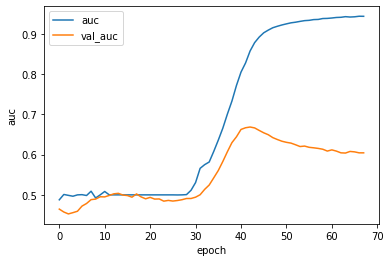

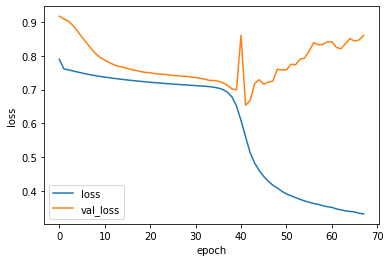

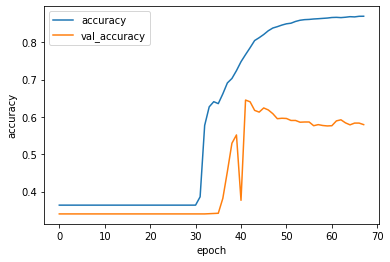

In [16]:
plot_metric('auc', 'val_auc', 'auc')
plot_metric('loss', 'val_loss', 'loss')
plot_metric('accuracy', 'val_accuracy', 'accuracy')

In [17]:
max(history.history['val_auc']) 

0.6686465740203857

In [18]:
model.save('hateful_memes_v3.h5')

In [19]:
#make into a fn
bucket = 'jh_hateful_memes_test'
client = storage.Client(project='hateful-memes', credentials=credentials)
objects = client.list_blobs(bucket, prefix='hatefulmemes_')
tfrecords = []
for object_ in objects:
    path = str(object_).split(', ')[1]
    gs_path = os.path.join('gs://', bucket, path)
    tfrecords.append(gs_path) #gs_path

In [20]:
def decode_example_testds(example):
    '''
    decodes single tfexample from TFrecord file
    '''
    features = {'id': tf.io.FixedLenFeature([], tf.int64),
                'text': tf.io.FixedLenFeature([], tf.string),
                'text_lemma': tf.io.FixedLenFeature([], tf.string),
                'text_lemma_no_stopwords': tf.io.FixedLenFeature([], tf.string),
                'text_no_stopwords':tf.io.FixedLenFeature([], tf.string),
                'image': tf.io.FixedLenFeature([], tf.string)}
    single_example = tf.io.parse_single_example(example, features)
    
    text = tf.io.parse_tensor(single_example['text'], out_type=tf.int32)
    image = tf.io.decode_jpeg(single_example['image'], 3)
    image = tf.image.resize_with_pad(image, *params['image_size'])
    image = image / 255.0
    label = single_example['id']
    return text, image, label

def no_tpu_output(text, image, label): #needs to be called last
    '''
    transforms ds output from text, image, label -> (text, image), label
    
    args:
        text: text output in ds
        image: image output in ds
        label: label output in ds
    returns:
        (text, image), label
        args will be otherwise unchanged
    '''
    return (text, image), label
    
    

In [21]:
def create_test_ds(files, batch_size=params['batch_size'], tpu=tpu, file_size=params['test_examples_per_file']):
    '''
    function to create dataset for test data
    ***clean up documentation for testds***
    args:
        files: list of str, filepaths of TFrecord files to be used in DS
        batch_size: int, batch size of training/validation step
        tpu: bool, default 'tpu' global variable, True is TPU is being used - not a bool update
        file_size: int, default num_examples_per_tfrecordfile variable,
            number of examples in each TFrecord file
    ***todo - update batch_size and file_size to params
    returns:
        ds: tensorflow input pipeline with images, text and labels
            if tpu is not None, output of ds is: text, image, label
            if tpu is None, output of ds is: (text, image), label
        ds_batches: int, number of steps in each epoch based on the batch_size
    '''
    ds = tf.data.TFRecordDataset(filenames = files)
    ds = ds.map(decode_example_testds, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    #consider adding augmentation to image - can't flip(?)
    if tpu is None:
        ds = ds.map(no_tpu_output, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.batch(batch_size, drop_remainder=False).prefetch(tf.data.experimental.AUTOTUNE)
#     ds = ds.cache() # -- confirm if dataset is small enough to be cached
    
    ds_batches = (len(files) * file_size) // batch_size
    if (len(files) * file_size) % batch_size > 0:
        ds_batches += 1
    return ds, ds_batches
    
    

In [22]:
test_ds, test_steps = create_test_ds(tfrecords, batch_size=1000)

In [23]:
for x_test in test_ds:
    predictions = model.predict(x_test, steps=test_steps)

In [24]:
_, _, prediction_ids = next(iter(test_ds.
                          # map(lambda img, ids:ids).
                          unbatch().
                          batch(1000)))#.numpy().astype('int')
prediction_ids = prediction_ids.numpy()

In [25]:
prediction_dict = {
    'id': prediction_ids,
    'proba': np.concatenate(predictions),
    'label': np.ones(1000, int)
}
submission_ds = pd.DataFrame(prediction_dict)



In [26]:
submission_ds.to_csv('submission.csv', index=False)